# Gather number of tiles and satellite passes for days in the month

In [66]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import shutil

inputs: -img_folder -out_path

In [ ]:
import sys
args = sys.argv
folderpath = args[1] # path to monthly folder

In [103]:
folderpath = '/Volumes/SURGE_DISK/PS_downloads_SK/2021-06/' # path to folders with downloaded images (monthly_

In [104]:
# grab all satellite IDs and dates of imagery
filelist = os.listdir(folderpath+'PSScene/'); filelist.sort()
dates = []; IDs = []; files = []
no_tiles  = 0
for file in filelist:
    if file.startswith('2') and file.endswith('harmonized_clip.tif'):
        date = file.split('_')[0] # grab the date
        sID = file.split('_')[-6] # grab the satellite ID (4 digit code)
        dates.append(date); IDs.append(sID); files.append(file) # append to list
        no_tiles+=1
sorted_dates = list(set(list(zip(dates, IDs)))) # set of the zipped date and ID
sorted_dates.sort() # sorted
satdate_df = pd.DataFrame(sorted_dates, columns=['date','sat_ID'])
satdate_df.head()

,date,sat_ID
0,20210601,0f4e
1,20210601,2448
2,20210602,0f32
3,20210604,1054
4,20210604,240f


In [105]:
# Print stats for the month:
unique_dates = list(set(satdate_df.date))
unique_dates.sort()
print(unique_dates)
print('For',unique_dates[0][:4], 'month', unique_dates[0][4:6],':')
print(no_tiles, 'total image tiles were acquired')
print('over',len(unique_dates),'days')

['20210601', '20210602', '20210604', '20210605', '20210606', '20210607', '20210608', '20210609', '20210610', '20210611', '20210612', '20210613', '20210614', '20210615', '20210617', '20210618', '20210619', '20210621', '20210622', '20210623', '20210624', '20210627', '20210628', '20210629', '20210630']
For 2021 month 06 :
194 total image tiles were acquired
over 25 days


In [106]:
# count number of satellites per day and number of tiles per day
satdates = []; no_sats = []; no_tiles_day = [];

for datestr in unique_dates:
    sat_df = satdate_df[satdate_df.date == datestr]
    sats_per_day = len(sat_df)
    satdates.append(datestr); no_sats.append(sats_per_day)
    
    tile_count = 0
    for idx, row in sat_df.iterrows():
        tile_count+=len(glob.glob(folderpath+'PSScene/'+datestr+'*'+row.sat_ID+'*harmonized_clip.tif'))
        
    no_tiles_day.append(tile_count)

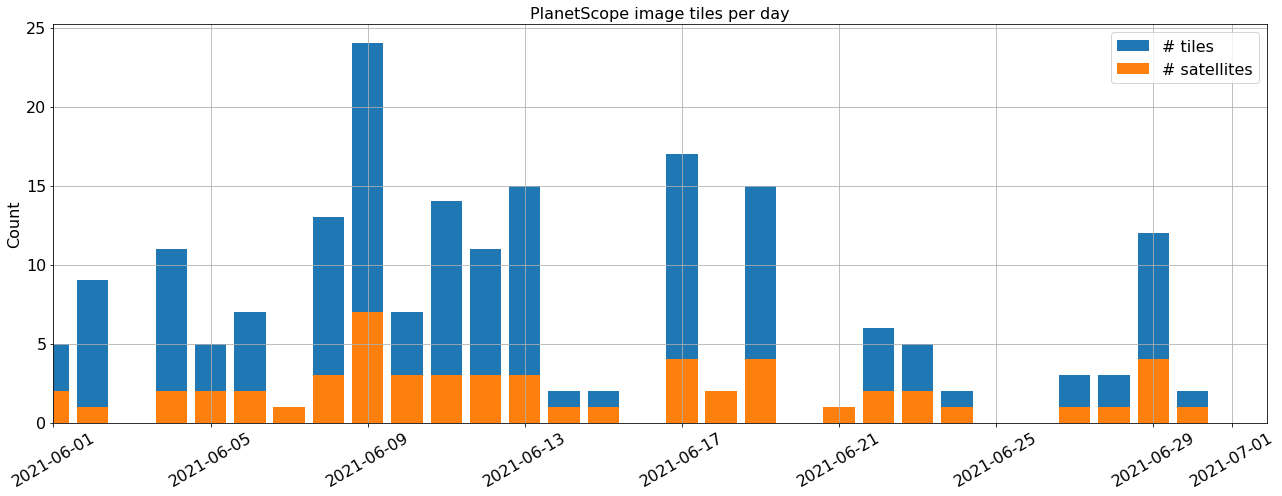

In [107]:
# plot
fs = 16
plt.figure(figsize=(18,7))
plt.bar(pd.to_datetime(satdates, format='%Y%m%d'), no_tiles_day)
plt.bar(pd.to_datetime(satdates, format='%Y%m%d'), no_sats)
plt.xlim(datetime.datetime(int(unique_dates[0][:4]),int(unique_dates[0][4:6]),1))
plt.xticks(rotation=30,fontsize=fs)
plt.yticks(fontsize=fs)
plt.ylabel('Count',fontsize=fs)
plt.title('PlanetScope image tiles per day',fontsize=fs)
plt.legend(['# tiles','# satellites'],fontsize=fs)
plt.grid()
plt.tight_layout()
plt.savefig(folderpath+'image_availability_summary.png', dpi=300)# export graph as img png
# plt.show()

In [108]:
# export data as CSV file for month
data_df = pd.DataFrame(list(zip(satdates, no_tiles_day, no_sats)),columns=['dates','tiles','sats'])
# data_df
data_df.to_csv(folderpath+'image_availability_summary.csv')

In [109]:
# delete all raw imagery
DELETE_LIST = []
DELETE_LIST.extend(glob.glob(folderpath+'PSScene/*json'))
DELETE_LIST.extend(glob.glob(folderpath+'PSScene/*.tif'))
DELETE_LIST.extend(glob.glob(folderpath+'PSScene/*.xml'))
for file in DELETE_LIST:
    os.remove(file)

    # delete the reprojected folder
shutil.rmtree(folderpath+'PSScene/reprojected/')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/SURGE_DISK/PS_downloads_SK/2021-06/PSScene/reprojected/'